<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Build and Save a Scikit-Learn model to DSX Repository</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
</table>

This notebook walks you through these steps:
 
- Access the data
- Cleanse data for analysis
- Explore data
- Build a classification model
- Save the model in the ML repository with associated meta data


### Step 1: Download Data as a Pandas Dataframe from Local file storage

Read the three Mortgage files from Local file storage - Insert them as PANDAS Dataframes

In [136]:
# Load the pandas libraries

import os, pandas as pd

In [137]:
# Import the CUSTOMER data 

df_data_1 = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/MortgageCustomer.csv')
df_data_1.head()

ID   Income AppliedOnline       Residence  Yrs at Current Address  \
0  100522.0  43982.0           YES  Owner Occupier                    13.0   
1  101756.0  59944.0           YES  Owner Occupier                    20.0   
2  101354.0  57718.0           YES  Owner Occupier                    25.0   
3  100512.0  45621.0           YES  Owner Occupier                     1.0   
4  100537.0  45081.0            NO  Owner Occupier                    14.0   

   Yrs with Current Employer  Number of Cards  Creditcard Debt  Loans  \
0                       11.0              2.0           1055.0    0.0   
1                       11.0              2.0           3894.0    0.0   
2                       16.0              2.0           1555.0    1.0   
3                       19.0              1.0           1878.0    0.0   
4                       15.0              2.0            713.0    1.0   

   Loan Amount  
0       9405.0  
1       9880.0  
2       6285.0  
3       9260.0  
4       8430.0

In [138]:
# Imprt the PROPERTY data

df_data_2 = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/Property.csv')
df_data_2.head()

ID  SalePrice  Location
0  100529.0     150000       110
1  100458.0     475000       110
2  101388.0     260000       120
3  101472.0     340000       100
4  100722.0     242500       110

In [139]:
# Import the DEFAULT data

df_data_3 = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/Default.csv')
df_data_3.head()



ID MortgageDefault
0  101600.0             YES
1  101731.0              NO
2  100548.0             YES
3  101472.0              NO
4  100562.0             YES

#### Rename dataframes and drop any unwanted fields

In [140]:
# Rename the default dataframe names to something more meaningful and drop any 

customer = df_data_1
property = df_data_2
default = df_data_3

In [141]:
# Check that the dataframes have the desired columns

print ("Customer dataframe:")
print (list(customer))
print ("")
print ("Property dataframe:")
print (list(property))
print ("")
print ("Default dataframe:")
print (list(default))

Customer dataframe:
['ID', 'Income', 'AppliedOnline', 'Residence', 'Yrs at Current Address', 'Yrs with Current Employer', 'Number of Cards', 'Creditcard Debt', 'Loans', 'Loan Amount']

Property dataframe:
['ID', 'SalePrice', 'Location']

Default dataframe:
['ID', 'MortgageDefault']


### Step 2: Merge Files

In [142]:
merged = pd.merge(pd.merge(customer, property, on='ID'),default,on='ID')
merged.head(3)

ID   Income AppliedOnline       Residence  Yrs at Current Address  \
0  100522.0  43982.0           YES  Owner Occupier                    13.0   
1  101756.0  59944.0           YES  Owner Occupier                    20.0   
2  101354.0  57718.0           YES  Owner Occupier                    25.0   

   Yrs with Current Employer  Number of Cards  Creditcard Debt  Loans  \
0                       11.0              2.0           1055.0    0.0   
1                       11.0              2.0           3894.0    0.0   
2                       16.0              2.0           1555.0    1.0   

   Loan Amount  SalePrice  Location MortgageDefault  
0       9405.0     500000       110              NO  
1       9880.0     750000       110              NO  
2       6285.0     155000       130             YES

### Step 3: Simple Data Preparation - Rename some columns and ensure correct data types 
This step is to remove spaces from columns names

In [143]:
merged = merged.rename(index=str, columns={"Yrs at Current Address":"YearCurrentAddress", "Yrs with Current Employer":"YearsCurrentEmployer",\
                      "Number of Cards":"NumberOfCards","Creditcard Debt":"CCDebt","Loan Amount":"LoanAmount"})
merged.head(3)

ID   Income AppliedOnline       Residence  YearCurrentAddress  \
0  100522.0  43982.0           YES  Owner Occupier                13.0   
1  101756.0  59944.0           YES  Owner Occupier                20.0   
2  101354.0  57718.0           YES  Owner Occupier                25.0   

   YearsCurrentEmployer  NumberOfCards  CCDebt  Loans  LoanAmount  SalePrice  \
0                  11.0            2.0  1055.0    0.0      9405.0     500000   
1                  11.0            2.0  3894.0    0.0      9880.0     750000   
2                  16.0            2.0  1555.0    1.0      6285.0     155000   

   Location MortgageDefault  
0       110              NO  
1       110              NO  
2       130             YES

Check data types and re-cast numeric fields to **Integers**

In [144]:
merged.dtypes

ID                      float64
Income                  float64
AppliedOnline            object
Residence                object
YearCurrentAddress      float64
YearsCurrentEmployer    float64
NumberOfCards           float64
CCDebt                  float64
Loans                   float64
LoanAmount              float64
SalePrice                 int64
Location                  int64
MortgageDefault          object
dtype: object

In [145]:
merged[['ID','Income','YearCurrentAddress','YearsCurrentEmployer','NumberOfCards','CCDebt','Loans','LoanAmount']] = \
merged[['ID','Income','YearCurrentAddress','YearsCurrentEmployer','NumberOfCards','CCDebt','Loans','LoanAmount']].astype(int)
merged.dtypes

ID                       int64
Income                   int64
AppliedOnline           object
Residence               object
YearCurrentAddress       int64
YearsCurrentEmployer     int64
NumberOfCards            int64
CCDebt                   int64
Loans                    int64
LoanAmount               int64
SalePrice                int64
Location                 int64
MortgageDefault         object
dtype: object

### Step 4: Data Exploration

1) Obtain some data shape summaries in terms of number of fields and records <br>
2) Perform some exploratory analysis of distributions, scatterplots using two different graphics packages


In [146]:
print ("There are " + str(merged.shape[0]) + " records and " + str(merged.shape[1]) + " fields in the dataset.")

There are 419 records and 13 fields in the dataset.


In [147]:
import brunel
%brunel data('merged') bar x(Residence) y(Income) mean(CCDebt) color(MortgageDefault) stack tooltip(Income) \
| x(YearCurrentAddress) y(YearsCurrentEmployer) point color(MortgageDefault) tooltip(YearCurrentAddress, YearsCurrentEmployer) \
:: width=1100, height=400 

<IPython.core.display.Javascript object>


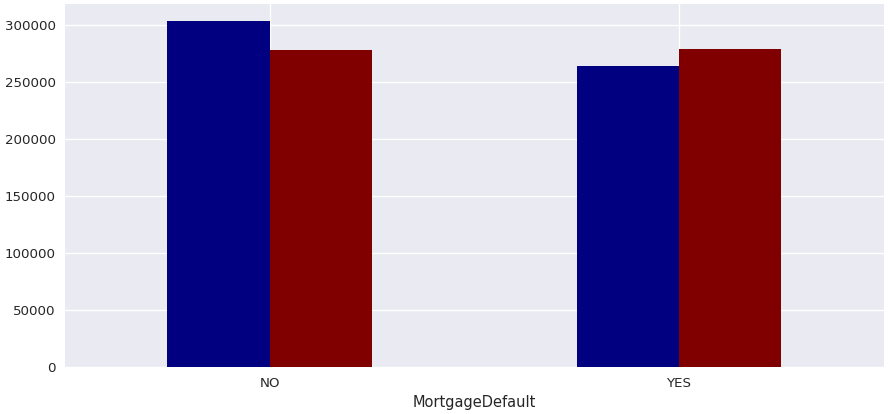

In [148]:
from pixiedust.display import *
display(merged)

### Step 5: Build the XGBoost model

In recent years, ensemble learning models took the lead and became popular among machine learning practitioners.

Ensemble learning model employs multiple machine learning algorithms to overcome the potential weaknesses of a single model. For example, if you are going to pick a destination for your next vacation, you probably ask your family and friends, read reviews and blog posts. Based on all the information you have gathered, you make your final decision.

This phenomenon is referred as the Wisdom of Crowds (WOC) in social sciences and it states that averaging the answers (prediction or probability) of a group will often result better than the answer of one of its members. The idea is that the collective knowledge of diverse and independent individuals will exceed the knowledge of any one of those individuals, helping to eliminate the noise.

XGBoost is an open source library for ensemble based algorithms. It can be used for classification, regression and ranking type of problems. XGBoost supports multiple languages, such as C++, Python, R, and Java. 

The Python library of XGBoost supports the following API interfaces to train and predict a model, also referred to as a `Booster`: 
- XGBoost's native APIs pertaining to the `xgboost` package, such as `xgboost.train()` or `xgboost.Booster`
- Scikit-Learn based Wrapper APIs: `xgboost.sklearn.XGBClassifier` and `xgboost.sklearn.XGBRegressor`

Details about using the scikit-learn based Wrapper APIs to create and predict an XGBoost model is explained in the the [Classify tumors with machine learning](https://apsportal.ibm.com/exchange/public/entry/view/ac820b22cc976f5cf6487260f4c8d9c8) notebook.

In this section you will learn how to train and test an XGBoost model using XGBoost's native python APIs. 

First, you must import the required libraries.

In [149]:
import xgboost as xgb

import pandas as pd

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from matplotlib import pyplot
import pprint
%matplotlib inline
import numpy as np


### 5.1: Prepare data

In this section, clean and transform the data in the Pandas data frame into the data that can be given as input for training the model. 

In [150]:
print("List of features with their corresponding count of null values : ")
print("---------------------------------------------------------------- ")
print(merged.isnull().sum())

List of features with their corresponding count of null values : 
---------------------------------------------------------------- 
ID                      0
Income                  0
AppliedOnline           0
Residence               0
YearCurrentAddress      0
YearsCurrentEmployer    0
NumberOfCards           0
CCDebt                  0
Loans                   0
LoanAmount              0
SalePrice               0
Location                0
MortgageDefault         0
dtype: int64


#### 5.1.2: Prepare the target data and feature columns

In this section, transform the existing data frame to derive the target data that contains the prediction value for the corresponding sample data. 

The goal of the model here is to predict whether a mortgage customer will default on their loan. The column Mortgage Default is currently a VarChar with values YES/NO and therefore it needs to be converted to a numeric

In [151]:
# Convert the VarChar columns to numeric columns

le = LabelEncoder()
merged.loc[:,'MortgageDefault']= le.fit_transform(merged.loc[:,'MortgageDefault'])
merged.head()

ID  Income AppliedOnline       Residence  YearCurrentAddress  \
0  100522   43982           YES  Owner Occupier                  13   
1  101756   59944           YES  Owner Occupier                  20   
2  101354   57718           YES  Owner Occupier                  25   
3  100512   45621           YES  Owner Occupier                   1   
4  100537   45081            NO  Owner Occupier                  14   

   YearsCurrentEmployer  NumberOfCards  CCDebt  Loans  LoanAmount  SalePrice  \
0                    11              2    1055      0        9405     500000   
1                    11              2    3894      0        9880     750000   
2                    16              2    1555      1        6285     155000   
3                    19              1    1878      0        9260     195000   
4                    15              2     713      1        8430     140000   

   Location  MortgageDefault  
0       110                0  
1       110                0  
2       130                1  
3       100                1  
4       110                0

In [152]:
# Check the values for MortgageDefault

merged.groupby(['MortgageDefault']).size()

MortgageDefault
0    239
1    180
dtype: int64

In [153]:
# Only need to run this once within your notebook

!pip install sklearn-pandas

mxnet 1.1.0 has requirement numpy<=1.13.3, but you'll have numpy 1.14.1 which is incompatible.


In [154]:
!pip install mxnet --no-deps

In [155]:
# Apply the LabelEncoder to encode the input features in numeric form where applicable
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
     ('Income', None),
     ('AppliedOnline', LabelEncoder()),
     ('Residence', LabelEncoder()),
     ('YearCurrentAddress',None),
     ('YearsCurrentEmployer',None),
     ('NumberOfCards',None),
     ('CCDebt',None),
     ('Loans',None),
     ('LoanAmount',None),
     ('SalePrice',None),
     ('Location',None)
    ])

In [156]:
# Drop the Varchar fields from the analysis
feature_cols = ['Income','YearCurrentAddress','YearsCurrentEmployer','NumberOfCards','CCDebt','Loans','LoanAmount','SalePrice','Location']
features_df = merged[feature_cols]
features_df.head()

Income  YearCurrentAddress  YearsCurrentEmployer  NumberOfCards  CCDebt  \
0   43982                  13                    11              2    1055   
1   59944                  20                    11              2    3894   
2   57718                  25                    16              2    1555   
3   45621                   1                    19              1    1878   
4   45081                  14                    15              2     713   

   Loans  LoanAmount  SalePrice  Location  
0      0        9405     500000       110  
1      0        9880     750000       110  
2      1        6285     155000       130  
3      0        9260     195000       100  
4      1        8430     140000       110

#### 5.1.3: Split the data set for training and testing

As the target and feature columns has been defined, you can now split the data set into two sets that will be used for training the model and for testing the trained model. 

In [157]:
# define the label (Target Field) and features
# split the data to training and testing set
y = np.float32(merged.MortgageDefault)
x = features_df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#### 5.1.4: Construct DMatix objects 

DMatrix is the data interface provided by the XGBoost library. The training data and test data are converted as DMatrix objects to perform training and to make predictions. The DMatrix objects can be created from various data formats, such as Numpy arrays, Pandas data frames, or a Scipy sparse array. For more information about the DMatrix interface, see [Python Package Introduction](http://xgboost.readthedocs.io/en/latest/python/python_intro.html).

In [158]:
# Prepare the **DMatrix** objects for training and testing based on the training and test data that was split above
dm_train = xgb.DMatrix(x_train, label=y_train)
dm_test = xgb.DMatrix(x_test)

### 5.2: Create XGBoost model (Booster)

In [159]:
# Set the parameters of the Booster that we are about to create and train.

param = {'objective':'multi:softmax', 'max_depth':2, 'eta':0.8, 'num_class': 2, 'eval_metric': 'auc', 'silent':1 }

In [160]:
# Create a Booster by using the training data set, which is in the form of a DMatrix object.

xgb_model = xgb.train(param, dm_train)

### Step 6: Model Evaluation 

In [161]:
# call xgb_model.predict() on your matrix test data to make a set of test predictions which are written to series y_predict

y_predict = xgb_model.predict(dm_test)
print(y_predict)


[1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]


In [162]:
# Look at the accuracy of the XGBoost model
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: " +  str(accuracy))


Accuracy: 0.6666666666666666


### Step 7: Understanding the XGBoost Model

#### 7.1: View the scored "Test" data

In [163]:
#Reset the index on the x_train data so that the join will match record by record and not require a key
x_test.reset_index(drop=True, inplace=True)

#Write the Actual and Predicted Mortgage Default values in to dataframes 
y_test_df = pd.DataFrame(y_test,columns=['MortgageDefault'])
y_pred_df = pd.DataFrame(y_predict,columns=['Pred Default'])

# Combine the three dataframes by index value rather than key field
scored_df = pd.concat([x_test, y_test_df, y_pred_df], axis=1)
scored_df.head()


Income  YearCurrentAddress  YearsCurrentEmployer  NumberOfCards  CCDebt  \
0   45246                   6                     5              1     737   
1   43185                   0                     8              1      20   
2   45659                  12                    17              1    9466   
3   44483                  16                    15              2     116   
4   45712                  14                    15              2    2216   

   Loans  LoanAmount  SalePrice  Location  MortgageDefault  Pred Default  
0      1        5300     175000       130              1.0           1.0  
1      0        9420     305000       130              0.0           0.0  
2      1       17050     340000       100              0.0           0.0  
3      0        7535     245000       130              1.0           1.0  
4      0        8910     215000       100              0.0           0.0

#### 7.2: Model Interpretation

To understand the model better, XGBoost provides APIs that you can use to get insights about the trees used for training the model and the importance of the features in constructing the Booster.

In [164]:
# Import plot / graph libraries required for model interpretation
import matplotlib.pyplot as plt
%matplotlib inline

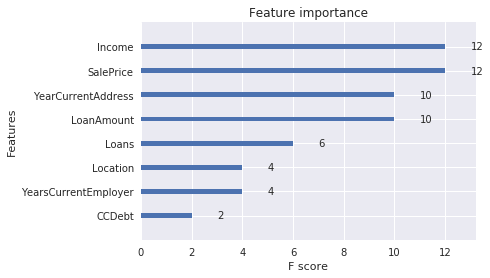

In [165]:
# Plot the feature importance
xgb.plot_importance(xgb_model)

### Step 8: Save Model in ML repository


In [167]:
from dsx_ml.ml import save

model_name = "Predict Mortgage Default XGBoost"
save(name = model_name,
     model = xgb_model,
     algorithm_type = 'Classification',
     test_data = x_test)

KeyError: 'sample'